<a href="https://colab.research.google.com/github/Jowayria-27/Artifical-Intelligence-Project/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Artificial Intelligence Project**


##Neural Network: ANN

In this project, we are aiming to predict customer churn, which means we are trying to predict which customer would unsubscribe from the service and leave the company. It is extremely crucial to be able to know what factors cause consumers to churn, so that firms work on reducing that factors and maintain and retain their customers. Losing customers lead to several consquences including loss of profit, loss of reputation, and a decrease in sales. Hence, businesses nowadays are attempting to train machines to know what factors are increasing customer churn. Other companies attempt to know which factors decrease customer churn, so that they can create retention campaigns.

Link: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

NOTE: If this notebook is going to be run, you will have to select the kaggle.json file that is there in the project folder.

---



## **First Step: Data Exploration Analysis**


We will let the code read the CSV and explore the dataset through the Kaggle API

First of all, we will import all the libraries needed

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statistics as s

%matplotlib inline
sns.set()

Then, we will use pip to install the kaggle library and upload the Kaggle API

In [141]:
!pip install Kaggle

In [142]:
files.upload()

{}

Next, we will create a directory named Kaggle and copy this file into this new directory

In [143]:
import os

os.makedirs('/root/.kaggle/', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


Finally, we will now download the dataset from Kaggle

In [144]:
!kaggle datasets download -d radheshyamkollipara/bank-customer-churn

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
License(s): other
bank-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


Next, we will unzip the dataset

In [145]:
!unzip /content/bank-customer-churn.zip -d /content/

Archive:  /content/bank-customer-churn.zip
replace /content/Customer-Churn-Records.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Customer-Churn-Records.csv  


Finally, we will read the data

In [146]:
import pandas as pd
df = pd.read_csv('/content/Customer-Churn-Records.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


Next, we will start with exploring the data for any missing values. Based on the data shown below, there are 10,000 rows and 18 columns. Fortunately, there are no missing data in each of the columns.



In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [148]:
for i in df.columns:
    if df[i].dtype == 'object' or df[i].nunique() < 10:  # Categorical check (e.g., strings or few unique values)
        print(f"{i}: {df[i].unique()}")
    else:  # Numeric check
        print(f"{i}: Min = {df[i].min()}, Max = {df[i].max()}")

RowNumber: Min = 1, Max = 10000
CustomerId: Min = 15565701, Max = 15815690
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: Min = 350, Max = 850
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Age: Min = 18, Max = 92
Tenure: Min = 0, Max = 10
Balance: Min = 0.0, Max = 250898.09
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]
EstimatedSalary: Min = 11.58, Max = 199992.48
Exited: [1 0]
Complain: [1 0]
Satisfaction Score: [2 3 5 4 1]
Card Type: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
Point Earned: Min = 119, Max = 1000


Each Column reprsents a different thing concerning the stock:
1. Row Number: It just describes where the row is positioned in the dataset
2. Customer ID: it uniquely represents the customers in the dataset through a number
3. Surname: the last name of the customer
4. Credit_Score: It is a number that represents the customer's ability and reliability to return money he/she borrows. The higher the number, the more likely a person would be trusted by the bank to borrow money. The lowest range is 350-649 and that is poor so loans would be less likely to be approved while the highest is 750-850 which is the excellent category and can easily be borrowed
5. Geography: Which country the customer is from. This dataset has customers mainly from France, Spain, and Germany
6. Gender: The gender of the customer which is either male or female
7. Age: the age of customers. Ages range from 18 to 92
8. Tenure: duration of the customer having the credit card and how long he/she has been using it in years. The customer that stayed the longest stayed for 10 years
9. Balance: how much the customer has in their bank account in Euros. The most a customer has owned was 250,898 Euros
10. NumofProducts: The number of services a customer is subscribed in. Some of those services include saving accounts, debit account, credit acccount, etc..
11. HasCrcard: if customer owns a credit card or not
12. IsActiveMember: Whether the person has been actively and recently using services
13. Estimated Salary: the customer's annual income
14. Exited: if the customer churned/ unsubscribed from the bank
15. Complain: if the customer has filed a complaint against the bank before or not
16. Satisfaction Score: It is a rating of 1-5 of how satisfied the customer is with the service. 1 being unsatisfed and 5 being satisfied
17. Card Type: What card type the user holds and there are 4 types: Diamond, Gold, Silver and Platinum. Diamond being for the most exclusive and important customers and Silver being for regular customers
18. Point Earned: The total amount of reward points the customer has collected through using the card. The highest points earend was 1000.

Next, we are going to find the frequency, mode, mean, median, and other statistics of the data using describe

In [149]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


Based on the data above, we can conclude the following:
1. Mean Credit Score is 650 while median is 652, so the credit score is almost normally distributed. 650 score is a fair score so majority of people are in the fair score
2. Half of the customers are from France
3. More than half this dataset is Male
4. Average Age of customers is between 37-38
5. The average and median of people had a 5 year tenure meaning that they stayed with the bank for 5 years
6. The mean balance customers have is 76485 Euros but the median is 97198 Euros meaning that distribution is left skewed meaning that there are some outliers that are small in value
7. Majority of people subscribed to one product
8. 70% of the people in this dataset has credit cards
9. Half of the people in this dataset are active members and have been recently using their cards
10. The average annual salary for all customers is 100,090 Euros
11. 20% of this dataset has churned
12. The average satisfaction score is 3
13. Only 20% of the customers have filed a complain
14. Almost 1/4th of the customrs have the diamond credit card type
15. The average points earned is 606 while median is 650


Next, we will drop all the unnecessary columns (rownumber, customerID, and surname) so we can prepare our data

In [150]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [151]:
for column in df.columns:
    print(f"{column} : {df[column].value_counts()}")
    print("====================================")


CreditScore : CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
Geography : Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender : Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age : Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
Tenure : Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Balance : Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64
NumOfProducts : NumOfProducts
1    5084
2    4590
3     266
4      60

In [152]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

CreditScore: Number of unique values 460
Geography: Number of unique values 3
Gender: Number of unique values 2
Age: Number of unique values 70
Tenure: Number of unique values 11
Balance: Number of unique values 6382
NumOfProducts: Number of unique values 4
HasCrCard: Number of unique values 2
IsActiveMember: Number of unique values 2
EstimatedSalary: Number of unique values 9999
Exited: Number of unique values 2
Complain: Number of unique values 2
Satisfaction Score: Number of unique values 5
Card Type: Number of unique values 4
Point Earned: Number of unique values 785


Then, we will convert the card type into ordinal categorical data as there is a order of Diamond, Platinum, Gold, and Silver

In [153]:
df['Card Type'] = pd.Categorical(df['Card Type'],
                                      categories=['SILVER', 'GOLD', 'PLATINUM','DIAMOND'],
                                      ordered=True)
df['Card Type']

,Card Type
0,DIAMOND
1,DIAMOND
2,DIAMOND
3,GOLD
4,GOLD
...,...
9995,DIAMOND
9996,PLATINUM
9997,SILVER
9998,GOLD


Next, let's determine the entropy for the columns

In [154]:
from scipy.stats import entropy

# Loop through each column in the dataset
for col in df.columns:
    # Calculate the probabilities for the column
    prob_col = df[col].value_counts() / df[col].size

    # Compute the entropy
    col_entropy = entropy(prob_col, base=2)

    # Print the entropy of the column
    print(f'Entropy of {col}: {col_entropy}')



Entropy of CreditScore: 8.473776396422297
Entropy of Geography: 1.4985795298480267
Entropy of Gender: 0.9939654731937201
Entropy of Age: 5.305675269234496
Entropy of Tenure: 3.4105774680653966
Entropy of Balance: 9.011809359392855
Entropy of NumOfProducts: 1.1953038766627084
Entropy of HasCrCard: 0.8744634652266465
Entropy of IsActiveMember: 0.9993420021661021
Entropy of EstimatedSalary: 13.28751237954944
Entropy of Exited: 0.7294632993589241
Entropy of Complain: 0.730641286246473
Entropy of Satisfaction Score: 2.32168627960293
Entropy of Card Type: 1.9999972883540322
Entropy of Point Earned: 9.554446951654974


In [155]:
import numpy as np

# Loop through each column in the dataset
for col in df.columns:
    # Calculate the number of unique values in the column
    n = df[col].nunique()

    # Calculate log2(n) if n > 0
    log2_n = np.log2(n) if n > 0 else 0

    # Print the result
    print(f'Column: {col}, Unique values: {n}, log2(n): {log2_n}')

Column: CreditScore, Unique values: 460, log2(n): 8.845490050944376
Column: Geography, Unique values: 3, log2(n): 1.584962500721156
Column: Gender, Unique values: 2, log2(n): 1.0
Column: Age, Unique values: 70, log2(n): 6.129283016944966
Column: Tenure, Unique values: 11, log2(n): 3.4594316186372973
Column: Balance, Unique values: 6382, log2(n): 12.639792893279312
Column: NumOfProducts, Unique values: 4, log2(n): 2.0
Column: HasCrCard, Unique values: 2, log2(n): 1.0
Column: IsActiveMember, Unique values: 2, log2(n): 1.0
Column: EstimatedSalary, Unique values: 9999, log2(n): 13.287568102831404
Column: Exited, Unique values: 2, log2(n): 1.0
Column: Complain, Unique values: 2, log2(n): 1.0
Column: Satisfaction Score, Unique values: 5, log2(n): 2.321928094887362
Column: Card Type, Unique values: 4, log2(n): 2.0
Column: Point Earned, Unique values: 785, log2(n): 9.61654884377899


The lowest entropy is 0, while the highest entropy is log2(n) with n standing for the unique values in the column. All columns have high entropies; however



* Points Earned
* Card Type
* Satisfaction Score
* Estimated Salary
* Active Member
* Credit Score
* Geography
* Gender
* Tenure

All have extremely high entropy and does not have a pattern so far

While the Exited (Churn), Complain, Gender, Age, Balance, and Number of products have a high entropy but not as high. The entropy ratio is slightly smaller than the attributes mentioned at the beginning.




Next, let's check for any class imbalance

In [156]:
df['Exited'] = df['Exited'].astype('category').cat.codes
df['Exited'].value_counts()/df['Exited'].count()

,count
Exited,
0,0.7962
1,0.2038


There is a class imbalance as only 20% of this dataset did churn while the rest of the dataset did not churn.

## **Second Step: Data Visualization**

Next, we are going to create a correlation matrix and visualize the data we have so that we can better explore our data

First, the correlation matrix

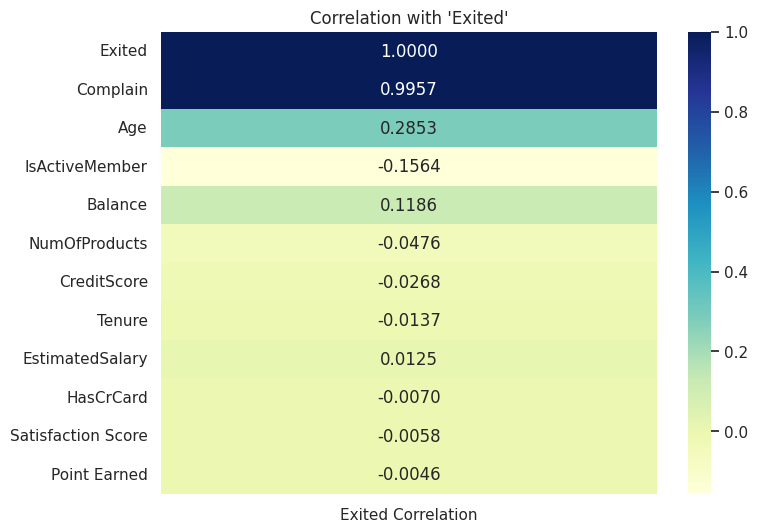

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Filter for the "exited" column and sort by absolute value
exited_corr = corr["Exited"].sort_values(ascending=False, key=abs)

# Set up the figure size
plt.figure(figsize=(8, 6))  # Adjust width and height as needed

# Plot the heatmap for the "exited" correlations
sns.heatmap(
    exited_corr.to_frame(),
    annot=True,
    cmap='YlGnBu',
    fmt=".4f",
    cbar=True,
    xticklabels=["Exited Correlation"],
    yticklabels=exited_corr.index
)

# Show the plot
plt.title("Correlation with 'Exited'")
plt.show()


Based on this correlation matrix, the following is shown:

1. There is an extremely high positive correlation with complain, and that means that almost everyone who complained exited
2. There is a high positive correalation with age, meaning that the older people got, the more likely they exited
3. There a positive correlation between age and exited, meaning that the older people got, the more likely they'll exit.
4. There is a slight positive relationship between balance and Exited which showss that the higher the balance (the more a person has in his/her account), the more likely they will exit
5. There is a negative correlation between Exited and isactive memeber which shows that the less the user is active, the more likely they will exit
6. There is a slight negative correlation between exited and numofproducts meaning that the more products customer has with the bank, the less likely he/she will exit
7. There is a slight negative relationship between credit score and exited meaning that the higher the credit score, the less likely a customer will exit
8. There is a slight negative relationship between between tenure and exited. The more a person spends being a customer of the bank, the less likely he/she will churn/exit
9. There is a slight positive relationship between estimated salary and exited. The higher a person's salary, the more likely they will exit the bank.
10. There is almost no correlation (very very weak negative correlation which makes it irrelevant) between hasCrCard, satisfaction score, and points earned. This goes to show that those factors might not necessarily affect exit/churn rates

<ipython-input-158-6762bb984fd0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=column, y='Exited', data=df, palette='viridis')
<ipython-input-158-6762bb984fd0>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-158-6762bb984fd0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=column, y='Exited', data=df, palette='viridis')
<ipython-input-158-6762bb984fd0>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),

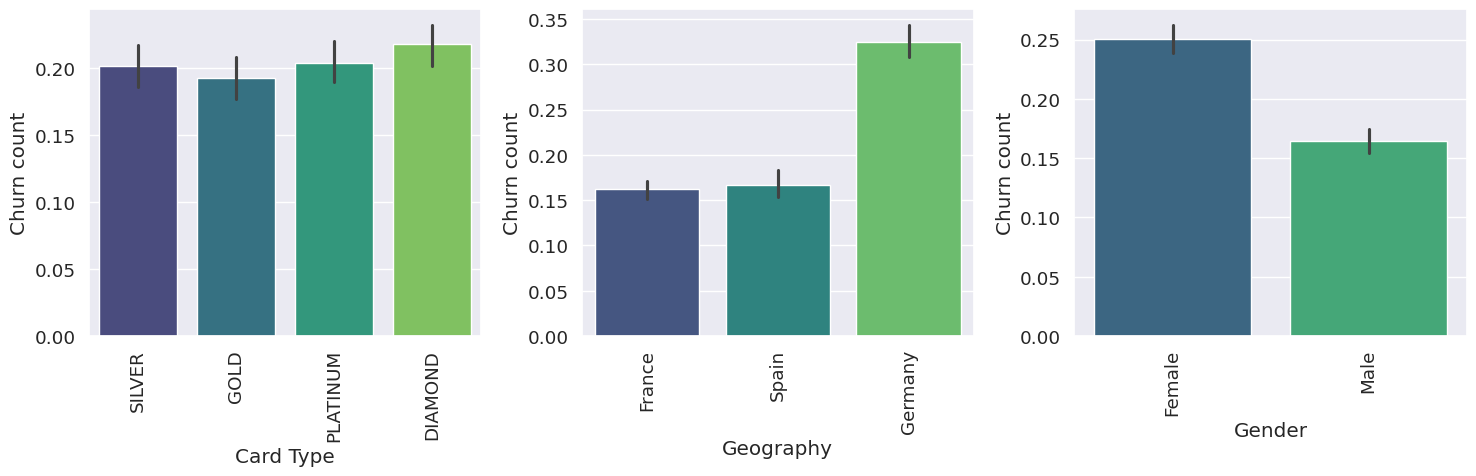

In [158]:
import math

categorical_features = []
categorical_features.append('Card Type')
for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)


# Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)

# Calculate the number of rows and columns for the grid based on the number of categorical features
n_features = len(categorical_features)
n_cols = 3  # You can set this to the number of columns you want
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    g = sns.barplot(x=column, y='Exited', data=df, palette='viridis')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn count')
    plt.xlabel(f'{column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Based on the visualizations above, Diamond card types were most likely to churn then Platinum, then silver, then Gold.

<ipython-input-159-1186b4f620c0>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-159-1186b4f620c0>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-159-1186b4f620c0>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


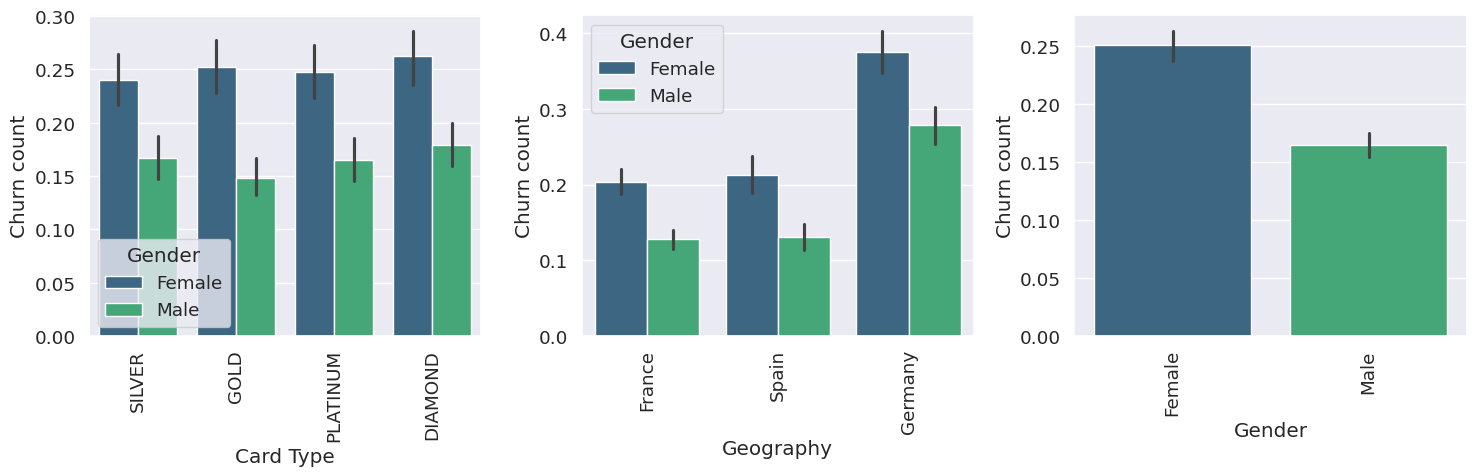

In [159]:
import math

categorical_features = []
categorical_features.append('Card Type')
for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)


# Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)

# Calculate the number of rows and columns for the grid based on the number of categorical features
n_features = len(categorical_features)
n_cols = 3  # You can set this to the number of columns you want
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    g = sns.barplot(x=column, y='Exited', data=df, hue='Gender', palette='viridis')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn count')
    plt.xlabel(f'{column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Based on the bar plot above, all card types almost have the same churn rate. However, for gender, women are more likely to churn than men. For countries, German customers are more likely to churn than customers of Spain and France, but that might be affected by the other factors such as German people having low credit scores or other circumstances.

Based on this, we can conclude that female German women are usually the most likely to churn. Card Type made almost no difference

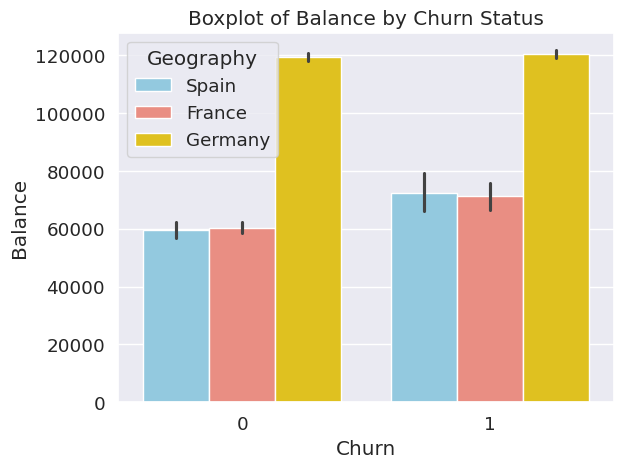

In [160]:
sns.barplot(data=df, x='Exited', y='Balance' , hue='Geography', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.title('Boxplot of Balance by Churn Status')
plt.show()


Based on this visualization, we can see that compared to the other countries, Germany has the highest balance. This shows that Germans customers tend to owe the most to the bank. In addition to that, this shows positive correlation between balance and churn as the customers who churned had higher balances.

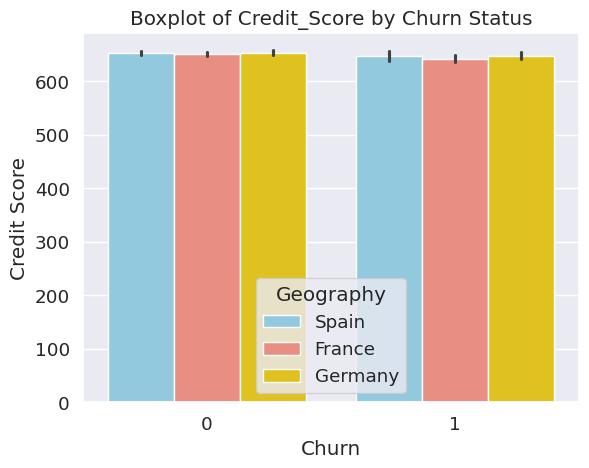

In [161]:
sns.barplot(data=df, x='Exited', y='CreditScore' , hue='Geography', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.title('Boxplot of Credit_Score by Churn Status')
plt.show()


This shows that despite the Germans having the most balance out of all the countries, they still manage to keep really good credit scores

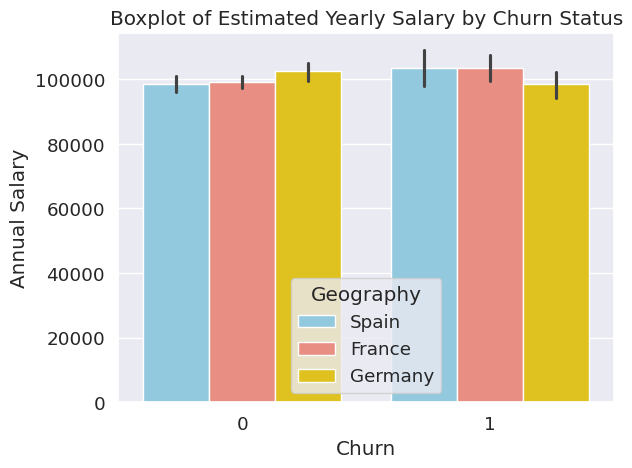

In [162]:
sns.barplot(data=df, x='Exited', y='EstimatedSalary' , hue='Geography', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Churn')
plt.ylabel('Annual Salary')
plt.title('Boxplot of Estimated Yearly Salary by Churn Status')
plt.show()


This graph shows that there is a slight positive relationship between churn and estimated salary as the average salary of the French and Spanish customers who churned was higher than the average of those who do not. However, German customers show the opposite relationship. The average salary of the German customers who churned was lower than those who did not churn.

<ipython-input-163-c91a0eb34ab3>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(data=df, x='Exited', y='Point Earned' , hue='Exited', palette=['skyblue', 'salmon','gold'])


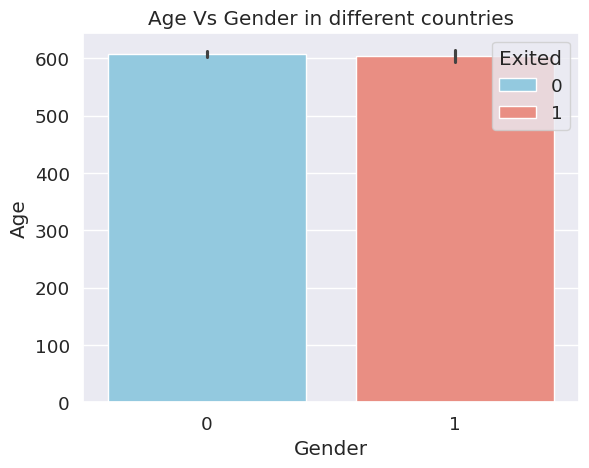

In [163]:
sns.barplot(data=df, x='Exited', y='Point Earned' , hue='Exited', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Vs Gender in different countries')
plt.show()

This shows that females in this data set is slightly older than the men in this dataset

<ipython-input-164-5d4d1e782aec>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(data=df, x='Exited', y='NumOfProducts' , hue='Exited', palette=['skyblue', 'salmon','gold'])


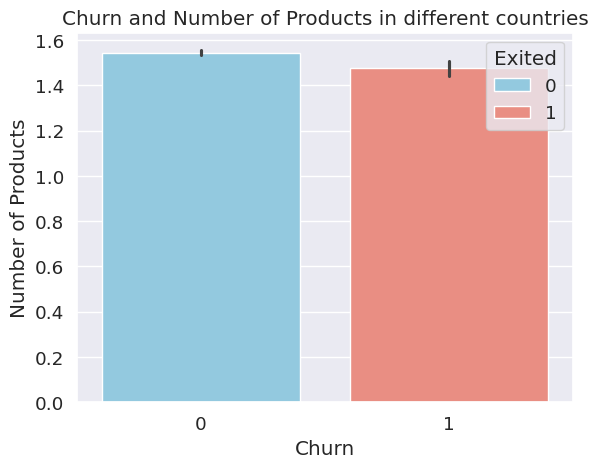

In [164]:
sns.barplot(data=df, x='Exited', y='NumOfProducts' , hue='Exited', palette=['skyblue', 'salmon','gold'])
plt.xlabel('Churn')
plt.ylabel('Number of Products')
plt.title('Churn and Number of Products in different countries')
plt.show()

This shows that the people who owned more bank products were less likely to churn

## **Third Step: Feature Selection and Preparation**

Based on the data visualizations above, the following will be dropped:
Point Earned,Satisfaction Score, and HasCrCard as both almost had the same Churn probability. In addition to that, we previously dropped row number, Surname, and CustomerID, since we do not need them and they will cause the machine learning to overfit. Complain will be also dropped as there is an extremely high correlation between Churn and Complain and it will cause the machine to overfit. Besides, we need the machine to know signs of churning before a complain.

The selected features are:
1. Gender
2. Geography
3. Card Type
4. Tenure
5. Age
6. Balance
7. Estimated Salary
8. Credit Score
9. Num of Products
10. IsActiveMember


The Exited will act as our output class since we do want to predict if customer will churn while rows of data without the churn will act as the input.

We will start to prepare our data through encoding and dropping

In [165]:
df_og=df.copy()
df.drop(['Point Earned', 'Satisfaction Score', 'HasCrCard','Complain'], axis=1, inplace=True)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Card Type
0,619,France,Female,42,2,0.00,1,1,101348.88,1,DIAMOND
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0,DIAMOND
2,502,France,Female,42,8,159660.80,3,0,113931.57,1,DIAMOND
3,699,France,Female,39,1,0.00,2,0,93826.63,0,GOLD
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,GOLD
5,645,Spain,Male,44,8,113755.78,2,0,149756.71,1,DIAMOND
6,822,France,Male,50,7,0.00,2,1,10062.80,0,SILVER
7,376,Germany,Female,29,4,115046.74,4,0,119346.88,1,DIAMOND
8,501,France,Male,44,4,142051.07,2,1,74940.50,0,GOLD
9,684,France,Male,27,2,134603.88,1,1,71725.73,0,GOLD


Next, we will encode all the categorical data

In [166]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Card Type
0,619,France,0,42,2,0.00,1,1,101348.88,1,DIAMOND
1,608,Spain,0,41,1,83807.86,1,1,112542.58,0,DIAMOND
2,502,France,0,42,8,159660.80,3,0,113931.57,1,DIAMOND
3,699,France,0,39,1,0.00,2,0,93826.63,0,GOLD
4,850,Spain,0,43,2,125510.82,1,1,79084.10,0,GOLD
5,645,Spain,1,44,8,113755.78,2,0,149756.71,1,DIAMOND
6,822,France,1,50,7,0.00,2,1,10062.80,0,SILVER
7,376,Germany,0,29,4,115046.74,4,0,119346.88,1,DIAMOND
8,501,France,1,44,4,142051.07,2,1,74940.50,0,GOLD
9,684,France,1,27,2,134603.88,1,1,71725.73,0,GOLD


Female equals 0 while Male equals 1

We will need to one hot encode card type as it is ordinal and we can use their cat code

In [167]:
df['Card Type'] = df['Card Type'].cat.codes
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Card Type
0,619,France,0,42,2,0.00,1,1,101348.88,1,3
1,608,Spain,0,41,1,83807.86,1,1,112542.58,0,3
2,502,France,0,42,8,159660.80,3,0,113931.57,1,3
3,699,France,0,39,1,0.00,2,0,93826.63,0,1
4,850,Spain,0,43,2,125510.82,1,1,79084.10,0,1
5,645,Spain,1,44,8,113755.78,2,0,149756.71,1,3
6,822,France,1,50,7,0.00,2,1,10062.80,0,0
7,376,Germany,0,29,4,115046.74,4,0,119346.88,1,3
8,501,France,1,44,4,142051.07,2,1,74940.50,0,1
9,684,France,1,27,2,134603.88,1,1,71725.73,0,1


Last but not least, we need to one hot encode the Geography as it is nominal categorical data

In [168]:
onehot_encoder_geography = pd.get_dummies(df['Geography'], drop_first=True)  # Dummy variables for Geography
df = pd.concat([df, onehot_encoder_geography], axis=1)
df.drop('Geography', axis=1, inplace=True)


In [169]:
df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Card Type,Germany,Spain
0,619,0,42,2,0.00,1,1,101348.88,1,3,False,False
1,608,0,41,1,83807.86,1,1,112542.58,0,3,False,True
2,502,0,42,8,159660.80,3,0,113931.57,1,3,False,False
3,699,0,39,1,0.00,2,0,93826.63,0,1,False,False
4,850,0,43,2,125510.82,1,1,79084.10,0,1,False,True
5,645,1,44,8,113755.78,2,0,149756.71,1,3,False,True
6,822,1,50,7,0.00,2,1,10062.80,0,0,False,False
7,376,0,29,4,115046.74,4,0,119346.88,1,3,True,False
8,501,1,44,4,142051.07,2,1,74940.50,0,1,False,False
9,684,1,27,2,134603.88,1,1,71725.73,0,1,False,False


Last step is dividing the data into training and testing sets and scaling/normalizing them

In [210]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

data=df.copy()
X = data.drop(['Exited'], axis=1, errors='ignore')  # Replace 'CustomerId' and 'Churn' with actual column names
y = data['Exited']  # Replace 'Churn' with your target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building the ANN Model

In [213]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))  # Regularization

# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=35, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7764 - loss: 0.5177 - val_accuracy: 0.8256 - val_loss: 0.4170
Epoch 2/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8149 - loss: 0.4319 - val_accuracy: 0.8406 - val_loss: 0.3984
Epoch 3/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8215 - loss: 0.4258 - val_accuracy: 0.8450 - val_loss: 0.3789
Epoch 4/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8350 - loss: 0.4082 - val_accuracy: 0.8481 - val_loss: 0.3676
Epoch 5/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.3873 - val_accuracy: 0.8462 - val_loss: 0.3612
Epoch 6/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8446 - loss: 0.3673 - val_accuracy: 0.8487 - val_loss: 0.3560
Epoch 7/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.3667 - val_accuracy: 0.8519 - val_loss: 0.3555
Epoch 8/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.3696 - val_accuracy: 0.

In [208]:

model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8609 - loss: 0.3353


[0.3367106020450592, 0.8650000095367432]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[1542   65]
 [ 205  188]]


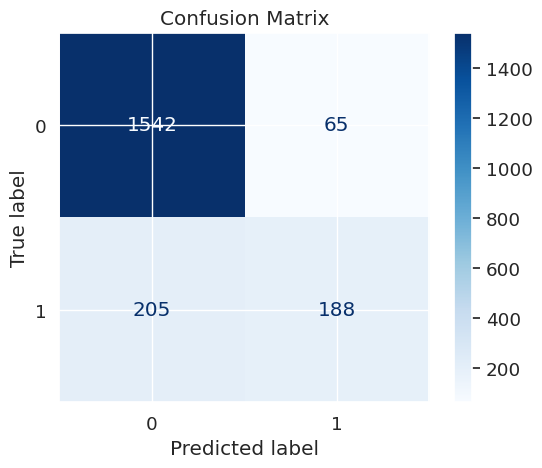

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.88      0.96      0.92      1607
       Churn       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [209]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set (output probabilities)
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold (default: 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))


## **Conclusion:**



In this experiment, we were able to conclude that the Markov Chain produced an accuracy of 54% due to it only predicted that the stock price was always increase; it disregarded all the times that price stayed as it was or it decreased. For us, those are not satisfactory results at all.

This was due to that the data is right skewed and that is normal in finance as inflation would always lead to increase in price.

A weakness in our dataset is that there was no attribute that shows if an positive or negative event took place. Having such attribute would have helped us find a better pattern through using Hidden Markov Model.

In fact, stocks rely on all events; whether those happened in the past or in the present; hence, a markov chain might not be the best option as it does not take in mind the past given the present. Stock prices are in fact one of the hardest things to predict as prices rely on a lot of factors such as inflation, customer expectations, political events, pandemics, natural disasters, etc... Some of those factors are not able to be predicted; hence, it is not easy to predict it with high accuracy. However, integrated several of datasets that have the events of the world with the stock prices might help produce better results in the long run